In [1]:
import sys
sys.path.insert(0, "../")
import time

from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

In [2]:
## This is the folder that holds recent observations by wfc3 on HST in a SNAP program

inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'
configFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/config/'

name = "u03396"

In [3]:
inFolder = inFolder + '/'
configFolder   = configFolder + '/'

outFolder = "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"


if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [4]:
df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

X0 = float(df.loc['X0'].value)
Y0 = float(df.loc['Y0'].value)

Config = {} 

Config["name"] = name
Config["inFolder"] = inFolder
Config["objRoot"] = objRoot
Config["configFolder"] = configFolder
Config["X0"] = X0
Config["Y0"] = Y0

In [5]:
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(model=0, mask=1, 
                                       smooth=1.0, minArea=5, thresh=0.9,
                                       r_aperture = 50,   # [pixel] ignore objects within the aperture
                                       renuc=1, **Config) 

catal_df.head()

Outputs_u03396/u03396_bb6d9894f133/obj.000.pro


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,THETA_IMAGE,...,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAG_ISO,MAGERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,rc
0,1,273.253,1.510,92.613343,79.924134,-7.9435,0.1983,0.928,0.485,8.9,...,0.2295,0.0,-249413120.0,0.0,0.0,-7.4644,0.1824,-7.7048,0.1858,632.172882
1,2,323.764,1.349,92.607150,79.922570,-7.2313,0.2702,0.705,0.452,-16.2,...,0.4706,0.0,-249413120.0,0.0,0.0,-7.6332,0.1320,-7.7390,0.1352,610.800229
2,3,605.754,1.332,92.572472,79.913854,-7.8941,0.1797,0.870,0.468,3.8,...,0.1831,0.0,-249413120.0,0.0,0.0,-8.2622,0.1145,-8.4332,0.1173,563.505916
3,4,622.840,1.638,92.570324,79.913331,-7.4713,0.2272,0.711,0.443,19.5,...,0.2824,0.0,-249413120.0,0.0,0.0,-7.5610,0.1410,-7.6785,0.1446,564.746749
4,5,790.523,1.328,92.549780,79.908141,-7.3255,0.2714,0.872,0.469,-0.4,...,0.2524,0.0,-249413120.0,0.0,0.0,-7.3595,0.1860,-7.5765,0.1899,606.121430


In [12]:
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(model=0, mask=1, 
                                       smooth=1.0, minArea=8, thresh=3,
                                       r_aperture = 50,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

unnamed(catal_df, **Config)
os.system("xpaset -p ds9 regions delete all")
os.system("xpaset -p ds9 regions ./ds9.reg &")

Outputs_u03396/u03396_bb6d9894f133/obj.000.pro
wrote:  Outputs_u03396/u03396_bb6d9894f133/u03396_se.lknj
GCs:  81
galaxies:  388


0

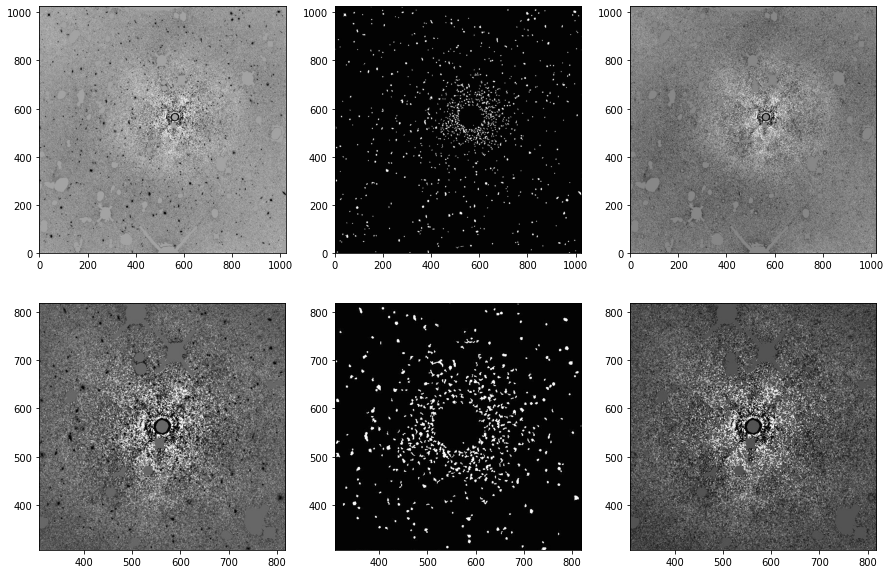

In [7]:
fig, AX = plt.subplots(2,3, figsize=(15,10))


tv(residual, ax=AX[0][0])
tv(sex_objname, ax=AX[0][1])
tv(sex_masked, ax=AX[0][2], options='')

zoom = 4
tv(residual, ax=AX[1][0], XY=[X0,Y0], zoom=zoom, options='sqrt')
tv(sex_objname, ax=AX[1][1], XY=[X0,Y0], zoom=zoom)
tv(sex_masked, ax=AX[1][2], XY=[X0,Y0], zoom=zoom, options='sqrt')



In [8]:
# os.system("ds9 "+residual+" &")